<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/P5E6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

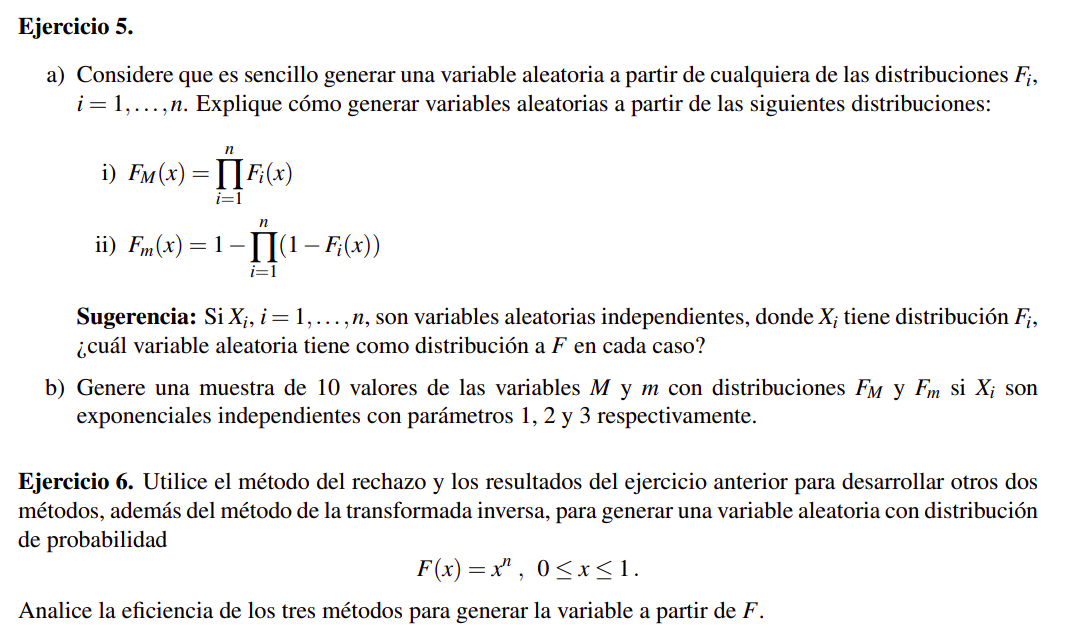

In [111]:
from random import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ejercicio 5
# a.i)

def maxX(generadores_de_muestras):
  return max([gen() for gen in generadores_de_muestras])

# a.ii)
def minX(generadores_de_muestras):
  return min([gen() for gen in generadores_de_muestras])

In [112]:
# Ejercicio 6
# X ~ F(x)=x^n
NUMERO_DE_MUESTRAS = 10_000
N_PARAMETRO = 10

def f(x):
    return np.where(
        (0 <= x) & (x <= 1),
        N_PARAMETRO*x**(N_PARAMETRO-1),
        0
    )

# def f(v):
#   return N_PARAMETRO * v**(N_PARAMETRO-1)

def F(v):
  return v**N_PARAMETRO

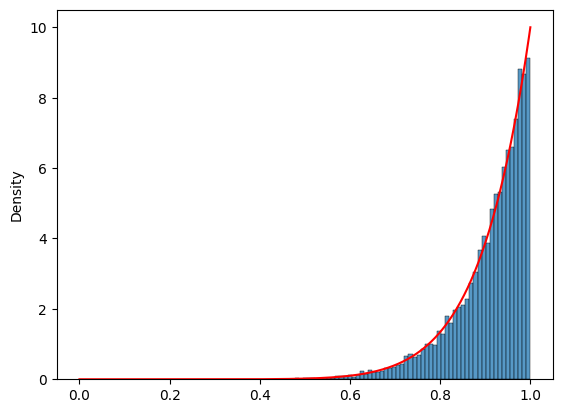

In [113]:
#@title { vertical-output: true}

# Por el ejercicio anterior

generadores = [random for _ in range(N_PARAMETRO)]

def maxX_generador_de_muestras():
  return maxX(generadores)

muestras = [maxX_generador_de_muestras() for _ in range(NUMERO_DE_MUESTRAS)]

# Grafico
x = np.linspace(0, 1, 1_000)
sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(muestras, stat='density')
plt.show()

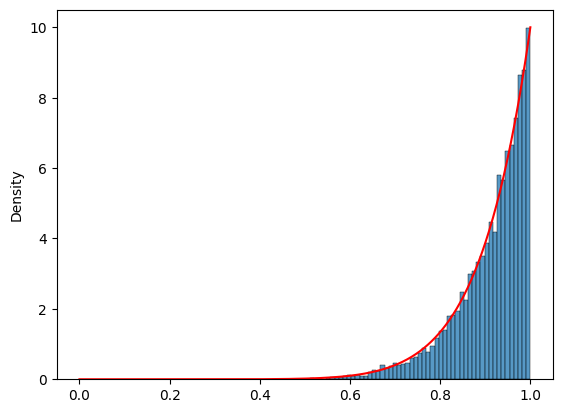

In [114]:
#@title { vertical-output: true}

# Por la transformada inversa
def TI_generador_de_muestras():
  u = random()
  return u**(1/N_PARAMETRO)

muestras = [TI_generador_de_muestras() for _ in range(NUMERO_DE_MUESTRAS)]

# Grafico
x = np.linspace(0, 1, 1_000)
sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(muestras, stat='density')
plt.show()

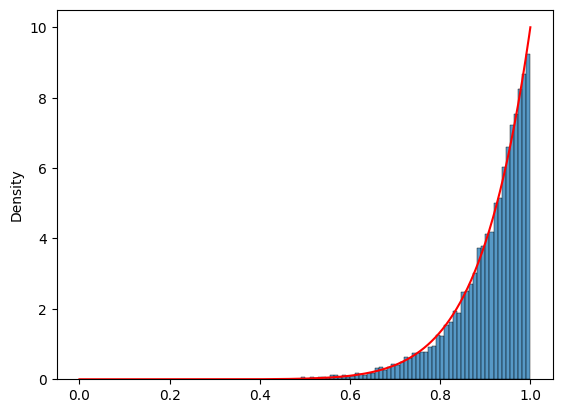

In [115]:
#@title { vertical-output: true}

# Por aceptacion y rechazo
def AyCR_generador_de_muestras():
  # f ya definido
  g = random # (distribucion uniforme)
  C = N_PARAMETRO

  while True:
    x = g()
    u = random()
    if u <= f(x)/C:
      return x

muestras = [AyCR_generador_de_muestras() for _ in range(NUMERO_DE_MUESTRAS)]

# Grafico
x = np.linspace(0, 1, 1_000)
sns.lineplot(x=x, y=f(x),color='red')
sns.histplot(muestras, stat='density')
plt.show()

## Comparaciones

In [116]:
%%timeit
maxX_generador_de_muestras()

1.3 µs ± 302 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [117]:
%%timeit
TI_generador_de_muestras()

180 ns ± 30.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [118]:
%%timeit
AyCR_generador_de_muestras()

52.3 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
